In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString
from haversine import haversine, Unit
import pandas as pd
from shapely.geometry import MultiPoint


In [75]:
df_fire = pd.read_csv('data/ca_daily_fire_2000_03252022.csv')
df_travel = pd.read_csv('data/california_jul_nov_2019.csv', index_col=0)

In [76]:
df_fire = df_fire[df_fire['year']>= 2019]
df_fire = df_fire[df_fire['year']<= 2021]

In [77]:
df_fire

,latitude,longitude,acq_date,satellite,instrument,confidence,year,month
180,32.519249,-114.732300,2021-08-02,N,VIIRS,100,2021,8
184,32.521088,-114.731140,2021-08-02,N,VIIRS,50,2021,8
190,32.525978,-114.735359,2021-08-02,N,VIIRS,50,2021,8
211,32.533710,-114.799103,2020-02-29,N,VIIRS,50,2020,2
225,32.536598,-114.718857,2020-07-15,N,VIIRS,50,2020,7
...,...,...,...,...,...,...,...,...
1116850,41.999905,-123.618187,2020-09-19,N,VIIRS,50,2020,9
1116851,41.999920,-123.597160,2020-09-09,N,VIIRS,50,2020,9
1116852,41.999920,-123.407028,2020-09-10,N,VIIRS,50,2020,9
1116857,41.999950,-123.621155,2020-09-20,N,VIIRS,50,2020,9


In [78]:

# Define coordinates for the three wildfires
czu_lightning_complex_coords = (37.183556, -122.244556)
kincaid_fire_coords = (38.792458, -122.780053)
august_complex_coords = (39.765, -122.673)

# Define a threshold distance within which a record is considered to belong to a wildfire
threshold_distance = 10

# Compute distance to each wildfire and filter the records based on threshold distance
df_fire_czu = df_fire.copy()
df_fire_czu['dist_to_czu'] = df_fire_czu.apply(lambda row: haversine((row['latitude'], row['longitude']), czu_lightning_complex_coords), axis=1)
df_fire_czu = df_fire_czu[df_fire_czu['dist_to_czu'] <= threshold_distance]

df_fire_kincaid = df_fire.copy()
df_fire_kincaid['dist_to_kincaid'] = df_fire_kincaid.apply(lambda row: haversine((row['latitude'], row['longitude']), kincaid_fire_coords), axis=1)
df_fire_kincaid = df_fire_kincaid[df_fire_kincaid['dist_to_kincaid'] <= threshold_distance]

df_fire_august = df_fire.copy()
df_fire_august['dist_to_august'] = df_fire_august.apply(lambda row: haversine((row['latitude'], row['longitude']), august_complex_coords), axis=1)
df_fire_august = df_fire_august[df_fire_august['dist_to_august'] <= threshold_distance]



In [79]:
# Convert acq_date to datetime
df_fire_czu['acq_date'] = pd.to_datetime(df_fire_czu['acq_date'])

# Define the date range
start_date = pd.to_datetime('2020-08-16')
end_date = pd.to_datetime('2020-09-22')

# Filter df_fire_czu by date range
df_fire_czu = df_fire_czu[(df_fire_czu['acq_date'] >= start_date) & (df_fire_czu['acq_date'] <= end_date)]


In [80]:
df_fire_czu

,latitude,longitude,acq_date,satellite,instrument,confidence,year,month,dist_to_czu
293288,37.094360,-122.244812,2020-08-19,N,VIIRS,50,2020,8,9.918182
293307,37.094666,-122.251495,2020-08-19,N,VIIRS,50,2020,8,9.903250
293315,37.094742,-122.251114,2020-08-20,N,VIIRS,50,2020,8,9.892774
293327,37.094879,-122.243340,2020-08-19,N,VIIRS,50,2020,8,9.861035
293344,37.095119,-122.245605,2020-08-19,N,VIIRS,50,2020,8,9.834199
...,...,...,...,...,...,...,...,...,...
314566,37.264931,-122.275085,2020-08-20,N,VIIRS,50,2020,8,9.443625
314581,37.265022,-122.270836,2020-08-21,N,VIIRS,50,2020,8,9.352696
314679,37.265621,-122.279373,2020-08-20,N,VIIRS,50,2020,8,9.631875
314792,37.266315,-122.283676,2020-08-20,N,VIIRS,50,2020,8,9.832671


In [81]:
# Convert acq_date to datetime
df_fire_kincaid['acq_date'] = pd.to_datetime(df_fire_kincaid['acq_date'])

# Define the date range
start_date = pd.to_datetime('2019-10-23')
end_date = pd.to_datetime('2019-11-06')

# Filter df_fire_czu by date range
df_fire_kincaid = df_fire_kincaid[(df_fire_kincaid['acq_date'] >= start_date) & (df_fire_kincaid['acq_date'] <= end_date)]

In [82]:
df_fire_kincaid

,latitude,longitude,acq_date,satellite,instrument,confidence,year,month,dist_to_kincaid
503158,38.702831,-122.788895,2019-10-27,N,VIIRS,50,2019,10,9.995537
503289,38.703400,-122.795700,2019-10-27,Aqua,MODIS,100,2019,10,9.995346
503354,38.703690,-122.766930,2019-10-27,N,VIIRS,50,2019,10,9.935955
503361,38.703701,-122.780380,2019-10-24,N,VIIRS,50,2019,10,9.869382
503400,38.703900,-122.790700,2019-10-27,Aqua,MODIS,100,2019,10,9.890407
...,...,...,...,...,...,...,...,...,...
523902,38.813416,-122.795296,2019-10-25,N,VIIRS,50,2019,10,2.678734
523974,38.813847,-122.788582,2019-10-25,N,VIIRS,50,2019,10,2.490541
524032,38.814171,-122.803986,2019-10-25,N,VIIRS,50,2019,10,3.182813
524039,38.814201,-122.805214,2019-10-25,N,VIIRS,50,2019,10,3.255628


In [83]:
# Convert acq_date to datetime
df_fire_august['acq_date'] = pd.to_datetime(df_fire_august['acq_date'])

# Define the date range
start_date = pd.to_datetime('2020-08-16')
end_date = pd.to_datetime('2020-11-12')

# Filter df_fire_czu by date range
df_fire_august = df_fire_august[(df_fire_august['acq_date'] >= start_date) & (df_fire_august['acq_date'] <= end_date)]

In [84]:
df_fire_august

,latitude,longitude,acq_date,satellite,instrument,confidence,year,month,dist_to_august
632411,39.675999,-122.680077,2020-08-19,N,VIIRS,50,2020,8,9.914966
632467,39.676350,-122.662659,2020-08-19,N,VIIRS,50,2020,8,9.897042
632591,39.677067,-122.685539,2020-08-19,N,VIIRS,100,2020,8,9.836353
632631,39.677349,-122.667809,2020-08-19,N,VIIRS,50,2020,8,9.756467
632683,39.677719,-122.650475,2020-08-19,N,VIIRS,50,2020,8,9.894576
...,...,...,...,...,...,...,...,...,...
670032,39.853210,-122.684624,2020-08-31,N,VIIRS,50,2020,8,9.858645
670046,39.853268,-122.679008,2020-09-01,N,VIIRS,50,2020,9,9.828375
670190,39.853691,-122.683655,2020-09-01,N,VIIRS,50,2020,9,9.903910
670220,39.853798,-122.682449,2020-09-01,N,VIIRS,100,2020,9,9.906833


In [85]:
import json

def mark_blocked_paths(df_fire, df_travel, save_path):
    # GeoDataFrame for travel data
    geometry_travel = [LineString([(row['lng_o'], row['lat_o']), (row['lng_d'], row['lat_d'])]) for idx, row in df_travel.iterrows()]
    gdf_travel = gpd.GeoDataFrame(df_travel, geometry=geometry_travel)

    # For each unique date in the fire data, create a Polygon that encompasses all points for that date
    df_fire['acq_date'] = pd.to_datetime(df_fire['acq_date'])
    unique_dates = df_fire['acq_date'].dt.date.unique()
    fire_polygons = []
    for date in unique_dates:
        df_date = df_fire[df_fire['acq_date'].dt.date == date]
        fire_points = MultiPoint([xy for xy in zip(df_date['longitude'], df_date['latitude'])])
        fire_polygon = fire_points.convex_hull
        fire_polygons.append(fire_polygon)

    # GeoDataFrame for fire data
    gdf_fire = gpd.GeoDataFrame(df_fire['acq_date'].drop_duplicates().reset_index(drop=True), geometry=fire_polygons)

    # Save fire polygons as GeoJSON
    gdf_fire.to_file(save_path, driver="GeoJSON")

    # Spatial join to find travel routes intersecting with fire
    join_result = gpd.sjoin(gdf_travel, gdf_fire, how="inner", op="intersects")

    # Get unique index values of travel data that intersect with fire
    blocked_paths = join_result.index.unique()

    # Create a new binary column in the original travel data
    df_travel['blocked'] = df_travel.index.isin(blocked_paths).astype(int)

    return df_travel, blocked_paths


In [86]:

# Apply function for each fire
df_travel_czu_blocked, blocking_paths_czu = mark_blocked_paths(df_fire_czu, df_travel.copy(), "czu_fire_polygons.geojson")
df_travel_kincaid_blocked, blocking_paths_kincaid = mark_blocked_paths(df_fire_kincaid, df_travel.copy(), "kincaid_fire_polygons.geojson")
df_travel_august_blocked, blocking_paths_august = mark_blocked_paths(df_fire_august, df_travel.copy(), "august_fire_polygons.geojson")

/Users/luisquinonespr/miniforge3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3508: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/luisquinonespr/miniforge3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3508: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/luisquinonespr/miniforge3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3508: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [87]:
df_travel_august_blocked.blocked.nunique()

2

In [88]:
df_travel_kincaid_blocked.blocked.nunique()

2

In [89]:
df_travel_czu_blocked.blocked.nunique()

2

In [90]:
df_fire_kincaid

,latitude,longitude,acq_date,satellite,instrument,confidence,year,month,dist_to_kincaid
503158,38.702831,-122.788895,2019-10-27,N,VIIRS,50,2019,10,9.995537
503289,38.703400,-122.795700,2019-10-27,Aqua,MODIS,100,2019,10,9.995346
503354,38.703690,-122.766930,2019-10-27,N,VIIRS,50,2019,10,9.935955
503361,38.703701,-122.780380,2019-10-24,N,VIIRS,50,2019,10,9.869382
503400,38.703900,-122.790700,2019-10-27,Aqua,MODIS,100,2019,10,9.890407
...,...,...,...,...,...,...,...,...,...
523902,38.813416,-122.795296,2019-10-25,N,VIIRS,50,2019,10,2.678734
523974,38.813847,-122.788582,2019-10-25,N,VIIRS,50,2019,10,2.490541
524032,38.814171,-122.803986,2019-10-25,N,VIIRS,50,2019,10,3.182813
524039,38.814201,-122.805214,2019-10-25,N,VIIRS,50,2019,10,3.255628


In [91]:
df_travel_kincaid_blocked

,geoid_d,lng_o,lat_o,lng_d,lat_d,date,visitor_flows,pop_flows,geometry,blocked
geoid_o,,,,,,,,,,
6037,6037,-118.261017,34.198001,-118.261017,34.198001,2019-07-23,1034193,20735310.0,"LINESTRING (-118.26102 34.19800, -118.26102 34...",1
6037,6059,-118.261017,34.198001,-117.776146,33.676913,2019-07-23,28948,580400.0,"LINESTRING (-118.26102 34.19800, -117.77615 33...",1
6037,6065,-118.261017,34.198001,-115.993849,33.743680,2019-07-23,5916,118614.0,"LINESTRING (-118.26102 34.19800, -115.99385 33...",1
6037,6071,-118.261017,34.198001,-116.178461,34.841438,2019-07-23,12652,253669.0,"LINESTRING (-118.26102 34.19800, -116.17846 34...",1
6037,6001,-118.261017,34.198001,-121.917885,37.650547,2019-07-23,703,14094.0,"LINESTRING (-118.26102 34.19800, -121.91789 37...",1
...,...,...,...,...,...,...,...,...,...,...
6049,6103,-120.725029,41.589834,-122.233885,40.125736,2019-11-06,1,21.0,"LINESTRING (-120.72503 41.58983, -122.23388 40...",1
6049,6067,-120.725029,41.589834,-121.344243,38.449315,2019-11-06,3,64.0,"LINESTRING (-120.72503 41.58983, -121.34424 38...",1
6049,6035,-120.725029,41.589834,-120.594333,40.673590,2019-11-06,17,363.0,"LINESTRING (-120.72503 41.58983, -120.59433 40...",1


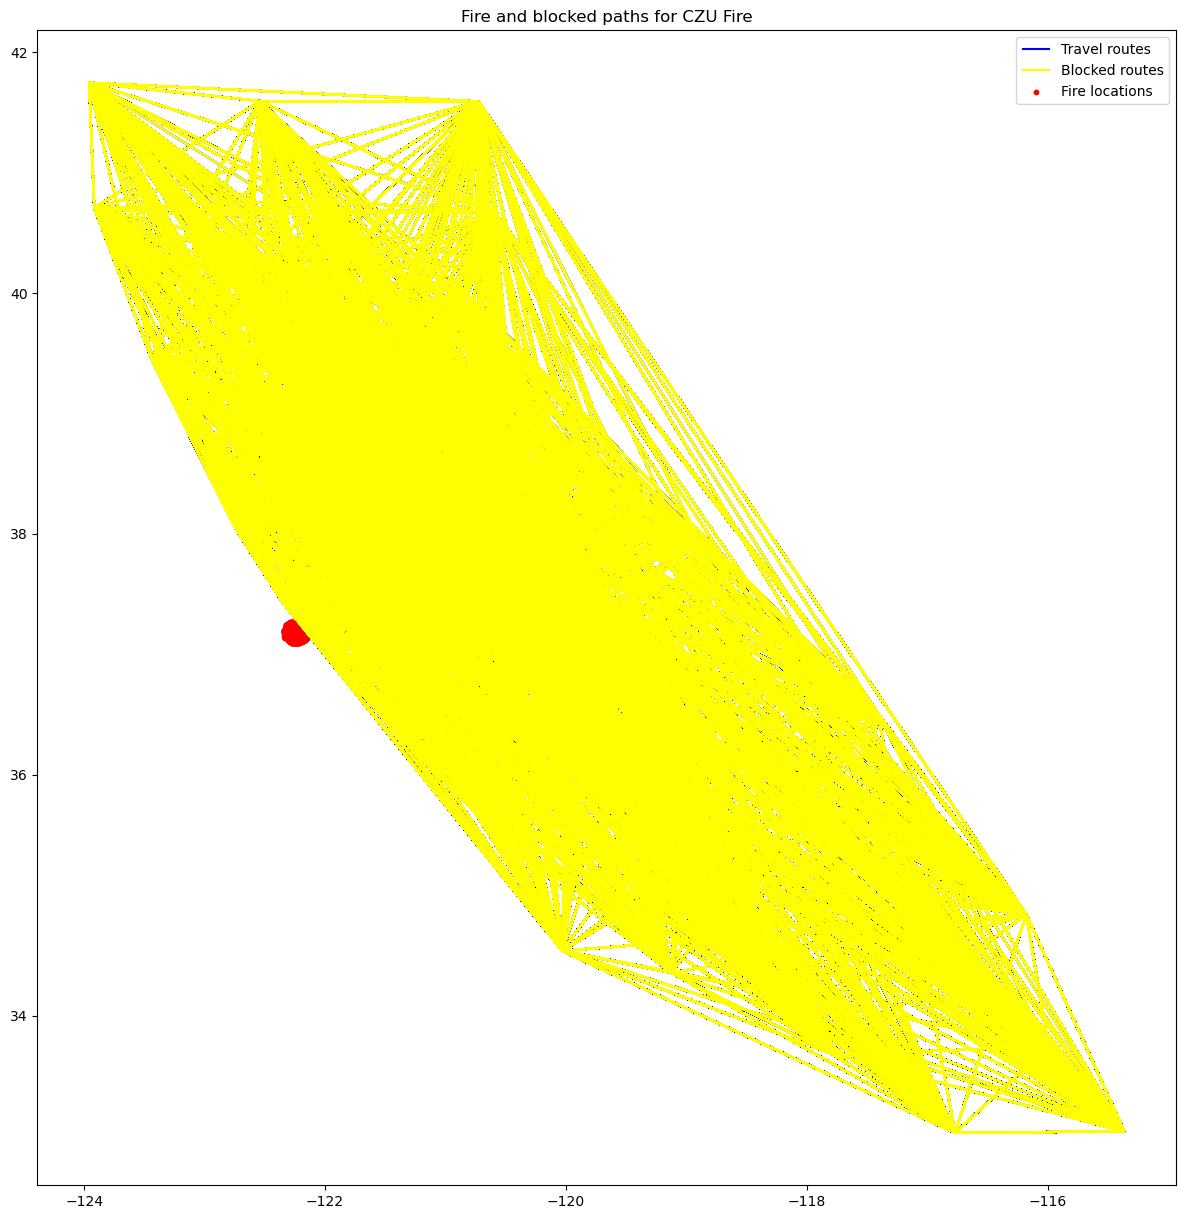

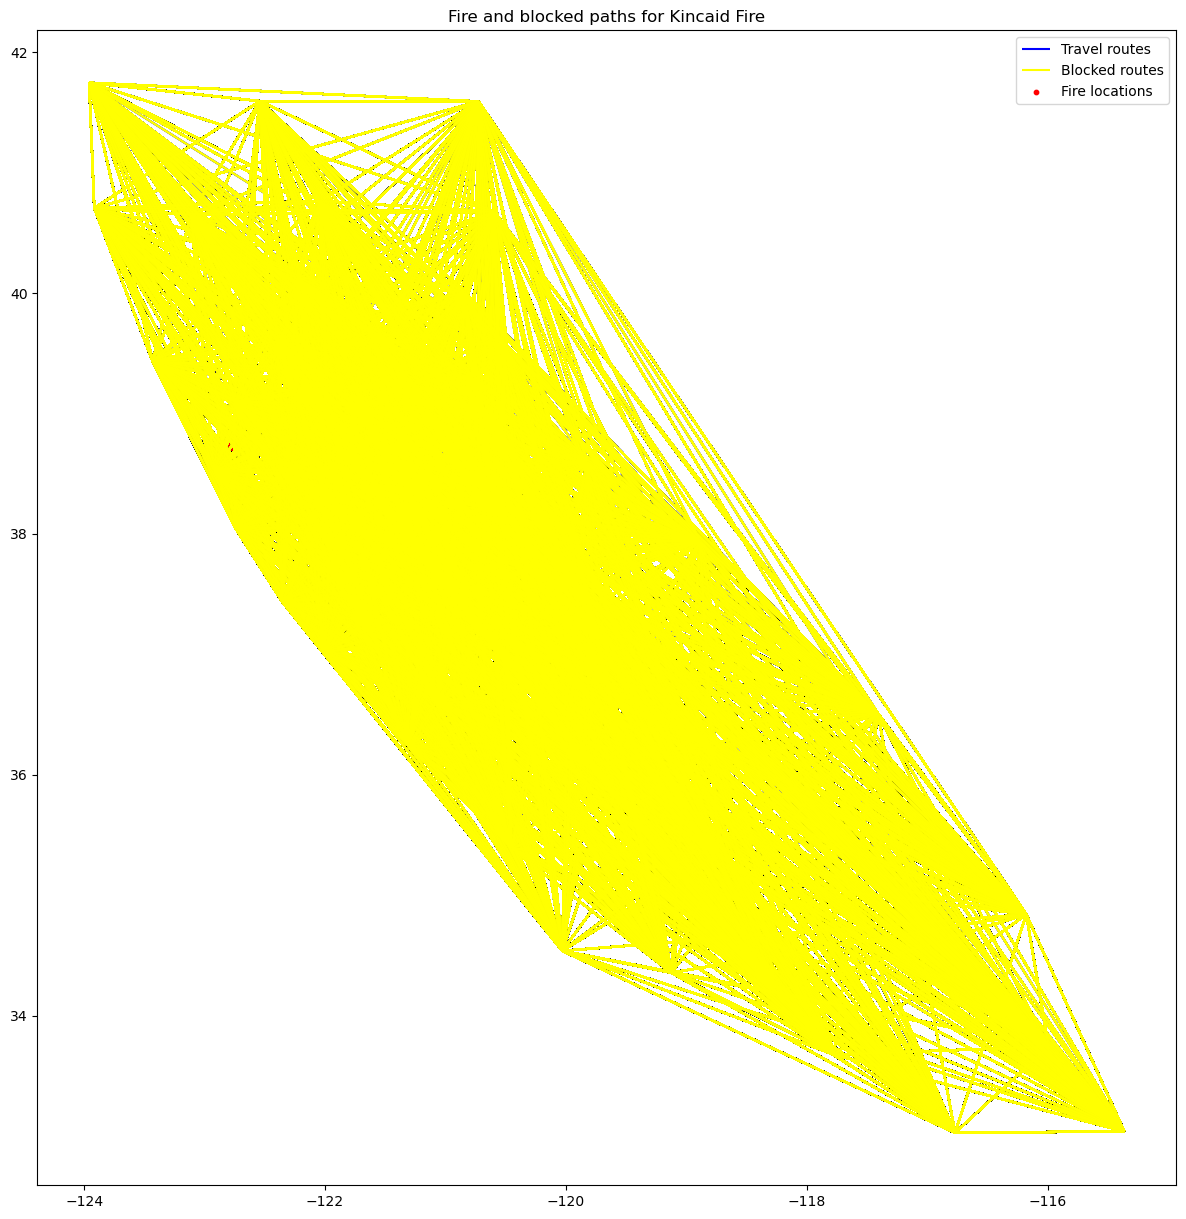

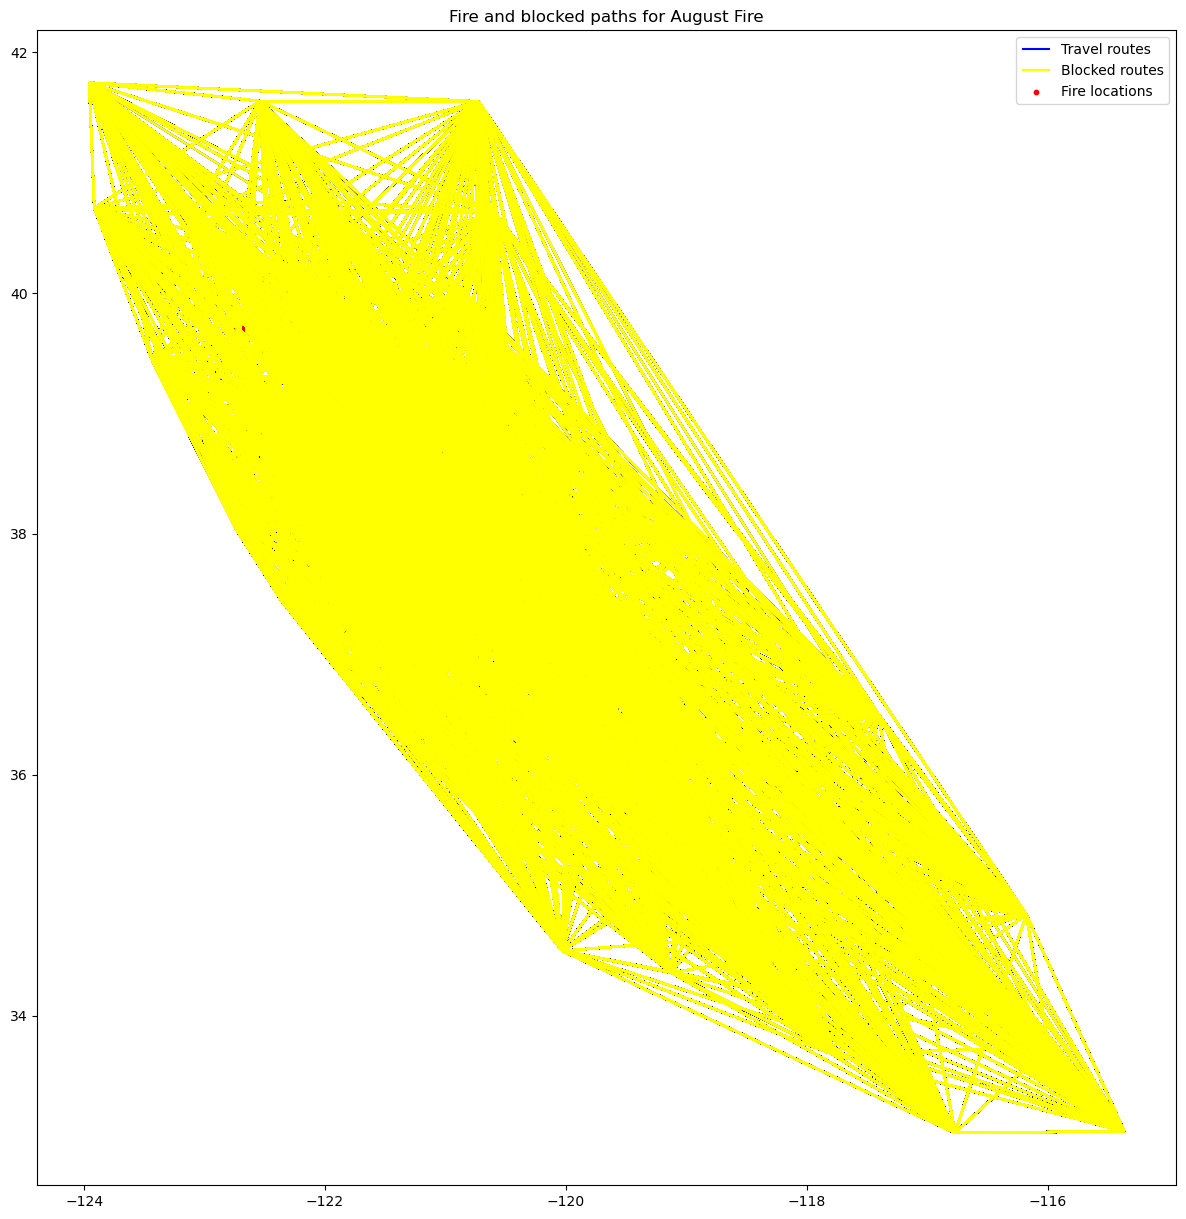

In [92]:
from shapely.geometry import Point, LineString

def plot_data(df_fire, df_travel, df_travel_blocked, fire_name):
    # Convert to GeoDataFrames
    geometry_fire = [Point(xy) for xy in zip(df_fire.longitude, df_fire.latitude)]
    gdf_fire = gpd.GeoDataFrame(df_fire, geometry=geometry_fire)

    geometry_travel = [LineString([(row['lng_o'], row['lat_o']), (row['lng_d'], row['lat_d'])]) for idx, row in df_travel.iterrows()]
    gdf_travel = gpd.GeoDataFrame(df_travel, geometry=geometry_travel)
    
    gdf_travel_blocked = gpd.GeoDataFrame(df_travel_blocked, geometry=df_travel_blocked['geometry'])

    # Create plot
    fig, ax = plt.subplots(figsize=(15, 15))
    gdf_travel.plot(ax=ax, color='blue', label='Travel routes') # non-blocked routes in blue
    gdf_travel_blocked.plot(ax=ax, color='yellow', label='Blocked routes') # blocked routes in yellow
    gdf_fire.plot(ax=ax, color='red', markersize=10, label='Fire locations')
    plt.title(f'Fire and blocked paths for {fire_name}')
    plt.legend()
    plt.show()

# Plot for each fire
plot_data(df_fire_czu, df_travel, df_travel_czu_blocked, 'CZU Fire')
plot_data(df_fire_kincaid, df_travel, df_travel_kincaid_blocked, 'Kincaid Fire')
plot_data(df_fire_august, df_travel, df_travel_august_blocked, 'August Fire')


In [93]:
import json
import datetime
from shapely.geometry import shape

with open('august_fire_polygons.geojson', 'r') as file:
    geojson = json.load(file)

dates = []
areas = []

for feature in geojson['features']:
    # Extract the acquisition date and convert it to a datetime object
    date_str = feature['properties']['acq_date']
    date = datetime.datetime.strptime(date_str, '%Y-%m-%dT%H:%M:%S')
    dates.append(date)
    
    # Calculate the area of the polygon and convert it to square kilometers
    geom = shape(feature['geometry'])
    area = geom.area / 1_000_000  # Convert from square meters to square kilometers
    areas.append(area)


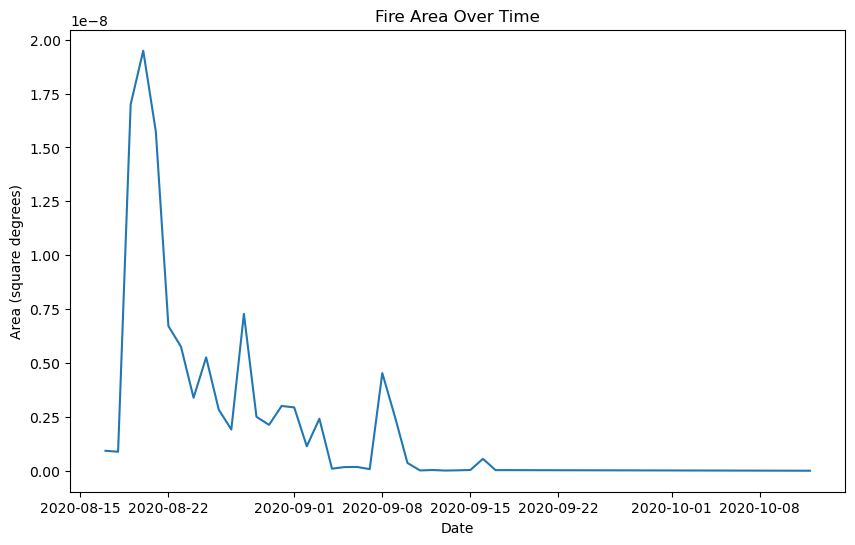

In [94]:
# Create a DataFrame
df = pd.DataFrame({'Date': dates, 'Area': areas})

# Sort the DataFrame by date
df.sort_values('Date', inplace=True)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Area'])
plt.xlabel('Date')
plt.ylabel('Area (square degrees)')
plt.title('Fire Area Over Time')
plt.show()

In [100]:
df_fire_kincaid

,latitude,longitude,acq_date,satellite,instrument,confidence,year,month,dist_to_kincaid,geometry
503158,38.702831,-122.788895,2019-10-27,N,VIIRS,50,2019,10,9.995537,POINT (-122.78889 38.70283)
503289,38.703400,-122.795700,2019-10-27,Aqua,MODIS,100,2019,10,9.995346,POINT (-122.79570 38.70340)
503354,38.703690,-122.766930,2019-10-27,N,VIIRS,50,2019,10,9.935955,POINT (-122.76693 38.70369)
503361,38.703701,-122.780380,2019-10-24,N,VIIRS,50,2019,10,9.869382,POINT (-122.78038 38.70370)
503400,38.703900,-122.790700,2019-10-27,Aqua,MODIS,100,2019,10,9.890407,POINT (-122.79070 38.70390)
...,...,...,...,...,...,...,...,...,...,...
523902,38.813416,-122.795296,2019-10-25,N,VIIRS,50,2019,10,2.678734,POINT (-122.79530 38.81342)
523974,38.813847,-122.788582,2019-10-25,N,VIIRS,50,2019,10,2.490541,POINT (-122.78858 38.81385)
524032,38.814171,-122.803986,2019-10-25,N,VIIRS,50,2019,10,3.182813,POINT (-122.80399 38.81417)
524039,38.814201,-122.805214,2019-10-25,N,VIIRS,50,2019,10,3.255628,POINT (-122.80521 38.81420)


In [101]:
# import networkx as nx

# # Construct a graph from the travel dataframe
# G = nx.from_pandas_edgelist(df_travel, 'lat_o', 'lat_d', create_using=nx.Graph())

# # Get blocked edges from the dataframe
# blocked_edges = df_travel[df_travel['blocked'] == 1][['lat_o', 'lat_d']].values

# # Remove blocked edges from the graph
# G.remove_edges_from(blocked_edges)

KeyError: 'blocked'

In [ ]:
# plt.plot(G)